#### Description
The dataset is a collection of information about patients appointments in Brazil with focus on keeping to the appointments by the patients.
#### Question
Using the data, we need to determine the important factors that can help in predicting if a patient will show up for their scheduled appointment.
#### Steps
    1.Import the necessary libraries and load dataset
    2.Get basic information about the dataset.
    3.Clean the dataset
        i.Correct the datatype for the necessary columns.
        ii.Rename columns if necessary
        iii.Drop rows that are not relevant to the analysis.
    4.Analyse and use visualizations to answer the project questions.

###### Import the necessary libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('appointments.csv')

##### Basic Information about the dataset

In [68]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [70]:
df.shape

(110527, 14)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information above, it can be seen that:

    i.there is no missing values in any of the columns;
    ii.of the 14 columns, 8 are integers, 1 is float and five are objects

#### Clean the dataset
    i.Correct the datatype for the necessary columns.
    ii.Rename columns if necessary
    iii.Check for duplicated rows
    iv.Drop rows that are not relevant to the analysis.

In [72]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Observations

    i.PatientID is float. Convert to int.
    ii.ScheduleDay and Appointmentday are objects. Converts to dates.
    iii.Correct wrong column names and anc change SMS_received and No-show for consistency with others.
    iv.All the appointment days have 00:00:00 timestamp. That will be ignored. Only the          dates will be needed. Similarly, the time part of the ScheduledDay will be ignored.

In [73]:
#Convert PatientID to int
df.PatientId = df.PatientId.astype('int64')

In [74]:
#Convert ScheduleDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
print(df.AppointmentDay.dtypes)
print(df.ScheduledDay.dtypes)
print(df[['ScheduledDay', 'AppointmentDay']].head(1))

datetime64[ns, UTC]
datetime64[ns, UTC]
               ScheduledDay            AppointmentDay
0 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00


In [75]:
#Use dt.date attribute to get rid of the time portion
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
print(df[['ScheduledDay', 'AppointmentDay']].head(2))

  ScheduledDay AppointmentDay
0   2016-04-29     2016-04-29
1   2016-04-29     2016-04-29


In [76]:
#Rename columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [77]:
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received':'SMSReceived', 'No-show':'NoShow'}, inplace = True)

In [78]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [79]:
#Check for duplicated rows
df.duplicated().sum()

0

In [80]:
#Summarise the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [81]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The minimum age in the dataset is -1 (which is not a valid age). To check it further:

In [82]:
df.query("Age == -1").shape[0]

1

There is only one row with age -1. 

In [83]:
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


Since Age cannot be negative, the row can be dropped using the index number

In [84]:
#df.drop(df.index[99832], inplace = True)

In [85]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [86]:
df.shape

(110526, 14)

Select the ages in ascending order

In [87]:
np.sort(df.Age.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [88]:
df.groupby('Age').count()['PatientId']

Age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: PatientId, Length: 103, dtype: int64

3539 of the patients are between 1 to 11 months old. Since they are infants, let check if they

Create a new column for the months for each scheduled appointment. This will help understand the number of scheduled appointments per month.

In [89]:
df['Month'] = pd.DatetimeIndex(df['ScheduledDay']).month

In [90]:

df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Month
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4


In [91]:
df.groupby('Month').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
Month,,,,,,,,,,,,,,
1,60,60,60,60,60,60,60,60,60,60,60,60,60,60
2,281,281,281,281,281,281,281,281,281,281,281,281,281,281
3,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614,3614
4,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339,25339
5,67421,67421,67421,67421,67421,67421,67421,67421,67421,67421,67421,67421,67421,67421
6,13749,13749,13749,13749,13749,13749,13749,13749,13749,13749,13749,13749,13749,13749
11,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12,61,61,61,61,61,61,61,61,61,61,61,61,61,61


In [92]:
df['ScheduledWeekDay'] = pd.to_datetime(df['ScheduledDay']).dt.day_name()

In [93]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Month,ScheduledWeekDay
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,5,Tuesday
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,5,Tuesday
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,4,Wednesday
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,4,Wednesday
110526,377511518121127,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,4,Wednesday


In [98]:
df.rename(columns = {'ScheduledWeekDay':'AppWeekDay'}, inplace = True)

### Appointment based on Gender

In [100]:
#Number that showed or did not show for appointments based on Gender
df.groupby('Gender')['NoShow'].value_counts()

Gender  NoShow
F       No        57245
        Yes       14594
M       No        30962
        Yes        7725
Name: NoShow, dtype: int64

In [101]:
per_F = (len(df.query("Gender == 'F'")) / df.shape[0]) * 100
per_F

64.99737618297956

In [102]:
per_M = (len(df.query("Gender == 'M'")) / df.shape[0]) * 100
per_M

35.00262381702043

From above we can see that:

    i. 71839 or about 65% of the women booked for the appointment
    ii 38687 or about 35% of men booked for the apppointment

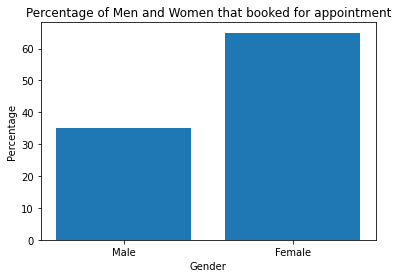

In [103]:
plt.bar(['Male', 'Female'], [per_M, per_F])
plt.title('Percentage of Men and Women that booked for appointment')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

Next, we find the proportion of men and women who showed up with respect to the individual total that booked for the appointments.

In [104]:
prop_F = len(df.query("Gender == 'F' & NoShow == 'No'")) / len(df.query("Gender == 'F'"))
prop_M = len(df.query("Gender == 'M' & NoShow == 'No'")) / len(df.query("Gender == 'M'"))
prop_F, prop_M

(0.7968512924734475, 0.8003205211052808)

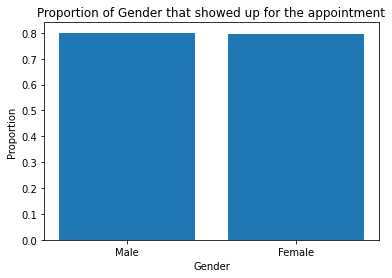

In [105]:
plt.bar(['Male', 'Female'], [prop_M, prop_F])
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Gender that showed up for the appointment')
plt.show()

From the above, it can be seen that the proportion of both Male and Female showing up for the appointment are almost the same. In essence, we can for now, say that their is no relationship between gender and a patient missing his/her appointment

### Appointments based on Hypertension

In [106]:
hyp_abs = len(df[df[('Hypertension')] == 0])
hyp_pre = len(df[df[('Hypertension')] == 1])
hyp_abs, hyp_pre

(88725, 21801)

In [107]:
hyp_abs_per = len(df[df[('Hypertension')] == 0]) / df.Hypertension.shape[0] * 100
hyp_pre_per = len(df[df[('Hypertension')] == 1]) / df.Hypertension.shape[0] * 100
hyp_abs_per, hyp_pre_per

(80.27522935779817, 19.724770642201836)

From above, it can be seen that 88725 (80.3%) of the patients are not hypertensive while 21801 (19.7%) are hypertensive.

Next we find the relationship between been hypertensive and showing up for the appointments by calculating the proportions

In [108]:
df.groupby('Hypertension')['NoShow'].value_counts()

Hypertension  NoShow
0             No        70178
              Yes       18547
1             No        18029
              Yes        3772
Name: NoShow, dtype: int64

In [109]:
#Proportion of patients with hypertension showing up for appointments:
prop_hyp = len(df.query("Hypertension == 1 & NoShow == 'No'")) / len(df[df[('Hypertension')] == 1])

prop_No_hyp = len(df.query("Hypertension == 0 & NoShow == 'No'")) / len(df[df[('Hypertension')] == 0])
prop_hyp, prop_No_hyp

(0.8269804137424889, 0.7909608340377571)

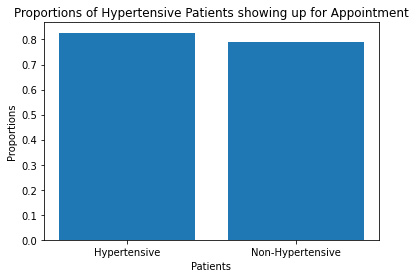

In [110]:
plt.bar(['Hypertensive', 'Non-Hypertensive'], [prop_hyp, prop_No_hyp])
plt.xlabel('Patients')
plt.ylabel('Proportions')
plt.title('Proportions of Hypertensive Patients showing up for Appointment')
plt.show()

From the calculations and graph above, we can see that the proportions of those with hypertension keeping to their appointments is is about 4% more than those without hypertension. This shows that been hypertensive can be considered a factor in determining if a patient will keep to the appointment.

### Appointments based on Diabetes

In [111]:
diab_abs = len(df[df[('Diabetes')] == 0])
diab_pre = len(df[df[('Diabetes')] == 1])
diab_abs, diab_pre

(102583, 7943)

In [112]:
diab_abs_per = len(df[df[('Diabetes')] == 0]) / df.Diabetes.shape[0] * 100
diab_pre_per = len(df[df[('Diabetes')] == 1]) / df.Diabetes.shape[0] * 100
diab_abs_per, diab_pre_per

(92.81345565749236, 7.186544342507645)

From above, it can be seen that 102583 (93%) of the patients does not have diabetes while 7943 (7%) are diabetic.

Next we find the relationship between been diabetic and showing up for the appointments by calculating the proportions

In [113]:
df.groupby('Diabetes')['NoShow'].value_counts()

Diabetes  NoShow
0         No        81694
          Yes       20889
1         No         6513
          Yes        1430
Name: NoShow, dtype: int64

In [114]:
#Proportion of patients with Diabetes showing up for appointments:
prop_diab = len(df.query("Diabetes == 1 & NoShow == 'No'")) / len(df[df[('Diabetes')] == 1])

prop_No_diab = len(df.query("Diabetes == 0 & NoShow == 'No'")) / len(df[df[('Diabetes')] == 0])
prop_diab, prop_No_diab

(0.8199672667757774, 0.7963697688700857)

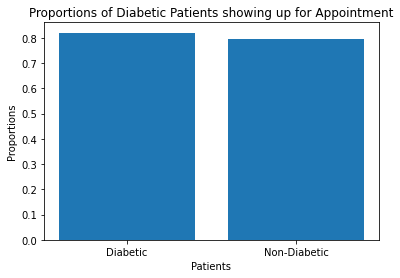

In [115]:
plt.bar(['Diabetic', 'Non-Diabetic'], [prop_diab, prop_No_diab])
plt.xlabel('Patients')
plt.ylabel('Proportions')
plt.title('Proportions of Diabetic Patients showing up for Appointment')
plt.show()

From above, we can note that the proportions of those with diabetes keeping to their appointments is almost the same as those without diabetes. This shows that been diabetic is not really a function of keeping to the appointment

### Appointments based on Alcoholism

In [116]:
alc_abs = len(df[df[('Alcoholism')] == 0])
alc_pre = len(df[df[('Alcoholism')] == 1])
alc_abs, alc_pre

(107166, 3360)

In [117]:
alc_abs_per = len(df[df[('Alcoholism')] == 0]) / df.Alcoholism.shape[0] * 100
alc_pre_per = len(df[df[('Alcoholism')] == 1]) / df.Alcoholism.shape[0] * 100
alc_abs_per, alc_pre_per

(96.95999131426089, 3.040008685739102)

From above, it can be seen that 107166 (97%) of the patients are not alcoholic while 3360 (3%) are alcoholic.

Next we find the relationship between been alcoholic and showing up for the appointments by calculating the proportions

In [118]:
df.groupby('Alcoholism')['NoShow'].value_counts()

Alcoholism  NoShow
0           No        85524
            Yes       21642
1           No         2683
            Yes         677
Name: NoShow, dtype: int64

In [119]:
#Proportion of patients with and without Alcoholism showing up for appointments:
prop_alc = len(df.query("Alcoholism == 1 & NoShow == 'No'")) / len(df[df[('Alcoholism')] == 1])

prop_No_alc = len(df.query("Alcoholism == 0 & NoShow == 'No'")) / len(df[df[('Alcoholism')] == 0])
prop_alc, prop_No_alc

(0.7985119047619048, 0.7980516208498964)

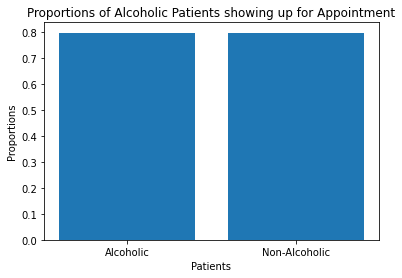

In [120]:
plt.bar(['Alcoholic', 'Non-Alcoholic'], [prop_alc, prop_No_alc])
plt.xlabel('Patients')
plt.ylabel('Proportions')
plt.title('Proportions of Alcoholic Patients showing up for Appointment')
plt.show()

From above, we can see that the proportions of the Alcoholic keeping to their appointments is the same as the non-Alcoholic. This shows that been Alcoholic is not really a function of keeping to the appointment

### Appointments based on Handicap

In [121]:
#Number of patients with or without handicap
hand_abs = len(df[df[('Handicap')] == 0])
hand_pre = len(df[df[('Handicap')] != 0])
hand_abs, hand_pre

(108285, 2241)

In [122]:
#Percentage of patients with or without handicap
hand_abs_per = len(df[df[('Handicap')] == 0]) / df.Handicap.shape[0] * 100
hand_pre_per = len(df[df[('Handicap')] != 0]) / df.Handicap.shape[0] * 100
hand_abs_per, hand_pre_per

(97.9724227783508, 2.0275772216492047)

From above, it can be seen that 108285 (98%) of the patients are not handicapped while 2241 (2%) are handicapped.

Next we find the relationship between been handicapped and showing up for the appointments by calculating the proportions

In [123]:
df.groupby('Handicap')['NoShow'].value_counts()

Handicap  NoShow
0         No        86373
          Yes       21912
1         No         1676
          Yes         366
2         No          146
          Yes          37
3         No           10
          Yes           3
4         No            2
          Yes           1
Name: NoShow, dtype: int64

In [124]:
len(df.query("Handicap != 0 & NoShow == 'No'"))

1834

In [125]:
#Proportion of patients with and without Handicap showing up for appointments:
prop_hand = len(df.query("Handicap != 0 & NoShow == 'No'")) / len(df[df[('Handicap')] != 0])

prop_No_hand = len(df.query("Handicap == 0 & NoShow == 'No'")) / len(df[df[('Alcoholism')] == 0])
prop_hand, prop_No_hand

(0.818384649709951, 0.8059739096355187)

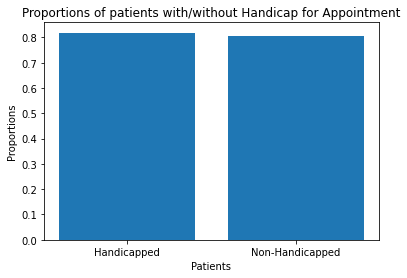

In [126]:
plt.bar(['Handicapped', 'Non-Handicapped'], [prop_hand, prop_No_hand])
plt.xlabel('Patients')
plt.ylabel('Proportions')
plt.title('Proportions of patients with/without Handicap for Appointment')
plt.show()

From above, it can be seen that:

    i.Handicap is classified into 4 groups, each designated with numbers 1 to 4, with 0 indicating those without handicap.
    ii. The proportion of those with handicap and showed up for their appointment is almost same as those without handicap.
    iii. Hence, we can see that been handicap might not be a factor in determining if a patient will keep to his/her appointment.

### Appointments based on Scholarship

Scholarship here is an indication of whether a patient is enrolled in Brasilian Wlefare Program

In [127]:
#Number of people with or without scholarship
sch_abs = len(df[df[('Scholarship')] == 0])
sch_pre = len(df[df[('Scholarship')] == 1])
sch_abs, sch_pre

(99665, 10861)

In [128]:
#Percentage of people with or without scholarship
sch_abs_per = len(df[df[('Scholarship')] == 0]) / df.Scholarship.shape[0] * 100
sch_pre_per = len(df[df[('Scholarship')] == 1]) / df.Scholarship.shape[0] * 100
sch_abs_per, sch_pre_per

(90.17335287624631, 9.826647123753688)

From above, it can be seen that 99665 (90%) of the patients have no scholarship while 10861 (9.8%) have.

Next we find the relationship between having scholarship and showing up for the appointments by calculating the proportions

In [129]:
df.groupby('Scholarship')['NoShow'].value_counts()

Scholarship  NoShow
0            No        79924
             Yes       19741
1            No         8283
             Yes        2578
Name: NoShow, dtype: int64

In [130]:
#Proportion of patients with Scholarship showing up for appointments:
prop_sch = len(df.query("Scholarship == 1 & NoShow == 'No'")) / len(df[df[('Scholarship')] == 1])
prop_No_sch = len(df.query("Scholarship == 0 & NoShow == 'No'")) / len(df[df[('Scholarship')] == 0])
prop_sch, prop_No_sch

(0.7626369579228433, 0.8019264536196258)

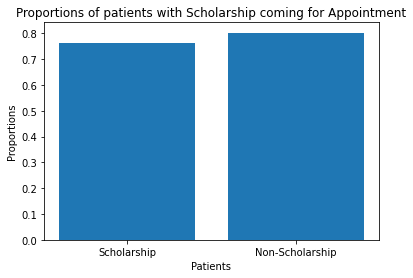

In [131]:
plt.bar(['Scholarship', 'Non-Scholarship'], [prop_sch, prop_No_sch])
plt.xlabel('Patients')
plt.ylabel('Proportions')
plt.title('Proportions of patients with Scholarship coming for Appointment')
plt.show()

From above, we can see that the proportions of those with scholarship keeping to their appointments is about 5% less than those without scholarship. Hence the availability of scholarship for the patients can be a factor in determining if a patient will make the appointment.

### Appointments based on SMSReceived

In [132]:
sms_abs = len(df[df[('SMSReceived')] == 0])
sms_pre = len(df[df[('SMSReceived')] == 1])
sms_abs, sms_pre

(75044, 35482)

In [133]:
sms_abs_per = len(df[df[('SMSReceived')] == 0]) / df.SMSReceived.shape[0] * 100
sms_pre_per = len(df[df[('SMSReceived')] == 1]) / df.SMSReceived.shape[0] * 100
sms_abs_per, sms_pre_per

(67.89714637279916, 32.10285362720084)

From above, it can be seen that more than 75000 (68%) of the patients did not rerceive SMS while more than 35000 (32%) received.

Next we find the relationship between receiving SMS and showing up for the appointments by calculating the proportions.

In [134]:
df.groupby('SMSReceived')['NoShow'].value_counts()

SMSReceived  NoShow
0            No        62509
             Yes       12535
1            No        25698
             Yes        9784
Name: NoShow, dtype: int64

In [135]:
#Proportion of patients the received SMS showing up for appointments:
prop_sms = len(df.query("SMSReceived == 1 & NoShow == 'No'")) / len(df[df[('SMSReceived')] == 1])
prop_No_sms = len(df.query("SMSReceived == 0 & NoShow == 'No'")) / len(df[df[('SMSReceived')] == 0])
prop_sms, prop_No_sms

(0.7242545516036301, 0.8329646607323703)

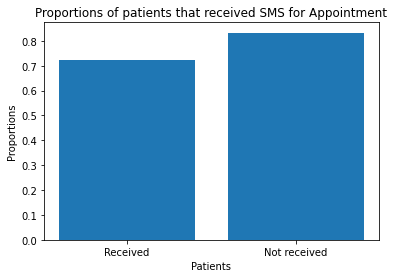

In [136]:
plt.bar(['Received', 'Not received'], [prop_sms, prop_No_sms])
plt.xlabel('Patients')
plt.ylabel('Proportions')
plt.title('Proportions of patients that received SMS for Appointment')
plt.show()

From above, we can see that the proportions of those that received SMS and made it for the appointment is about than 10% less than those that did not receive SMS. Hence the use of SMS can be a factor in determining if a patient will make the appointment.

### Appointment based on Age

In [137]:
#The individual age of the patients sorted in ascending order
np.sort(df.Age.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

 The ages of the patients ranges from 0 to 115

In [138]:
# Count the frequecy of the ages
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [139]:
#Number of patients that showed/did not show for appointment based on age
df.groupby('Age')['NoShow'].value_counts()

Age  NoShow
0    No        2900
     Yes        639
1    No        1858
     Yes        415
2    No        1366
               ... 
99   No           1
100  No           4
102  No           2
115  Yes          3
     No           2
Name: NoShow, Length: 203, dtype: int64

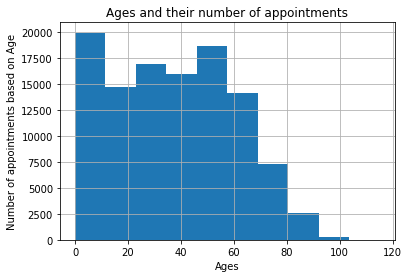

In [140]:
#A graph of the Age distribution
df['Age'].hist()
plt.xlabel('Ages')
plt.ylabel('Number of appointments based on Age')
plt.title('Ages and their number of appointments')
plt.show()

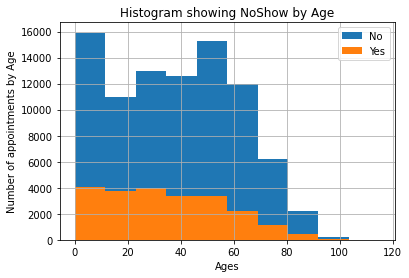

In [141]:
# Plotting the ages based on the people that showed up for the appointments
df.groupby(['NoShow']).Age.hist()
plt.ylabel('Number of appointments by Age')
plt.xlabel('Ages')
plt.title('Histogram showing NoShow by Age')
plt.legend(df['NoShow'].unique())
plt.show()

From the graph above, it can be deduced that the proportion of the patients that showed up for the appointments is the same across all the ages based on the total number of patients per age. This can be illustrated further below.


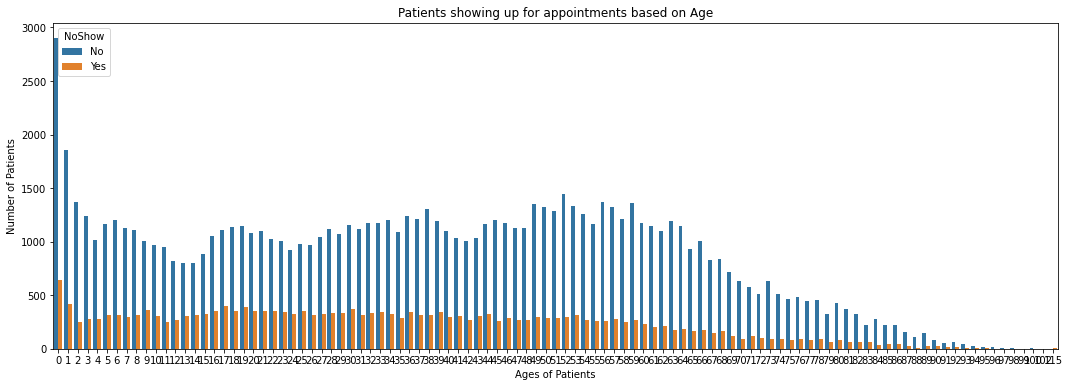

In [171]:
plt.figure(figsize = (18, 6))
ax = sns.countplot(x = df['Age'], hue = df['NoShow'])
plt.ylabel('Number of Patients')
plt.xlabel('Ages of Patients')
plt.title("Patients showing up for appointments based on Age")
plt.show()

To verify further, we can calculate the proportion of those that showed up based on their age

In [235]:
ageProp = df[df[("NoShow")] == 'No'].groupby(['Age']).size() / df.groupby('Age').size()
ageProp

Age
0      0.819441
1      0.817422
2      0.844252
3      0.816920
4      0.782910
         ...   
98     0.833333
99     1.000000
100    1.000000
102    1.000000
115    0.400000
Length: 103, dtype: float64

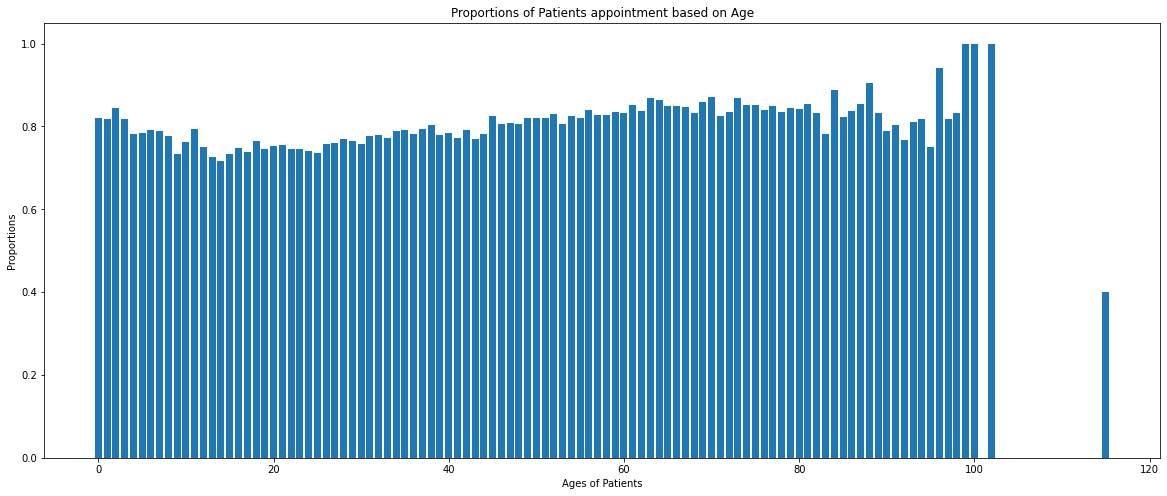

In [236]:
plt.figure(figsize = (20, 8))
plt.bar(ageProp.index, ageProp)
plt.xlabel('Ages of Patients')
plt.ylabel('Proportions')
plt.title('Proportions of Patients appointment based on Age')
plt.show()

We can see that the proportion of the patients that made it for their appointments based on their age is between 0.75 and 1.00, except for patient with age 115 whose proportion is 0.4 (2 people showed up for the appointment out of 5). Therefore, we can observe that age is not necessarily a factor of the patients been present for their appointments.

### Appointments based on Neighbourhood

In [181]:
#The various Neighbourhood of the patients sorted in ascending order
np.sort(df.Neighbourhood.unique())

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
       'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
       'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO',
       'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO',
       'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI',
       'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
       'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH',
       'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE',
       'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',

In [184]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [191]:
df.groupby('Neighbourhood')['NoShow'].value_counts()

Neighbourhood    NoShow
AEROPORTO        No           7
                 Yes          1
ANDORINHAS       No        1741
                 Yes        521
ANTÔNIO HONÓRIO  No         221
                           ... 
TABUAZEIRO       Yes        573
UNIVERSITÁRIO    No         120
                 Yes         32
VILA RUBIM       No         710
                 Yes        141
Name: NoShow, Length: 160, dtype: int64

A chart of the neighbourhoods based on the number of patients

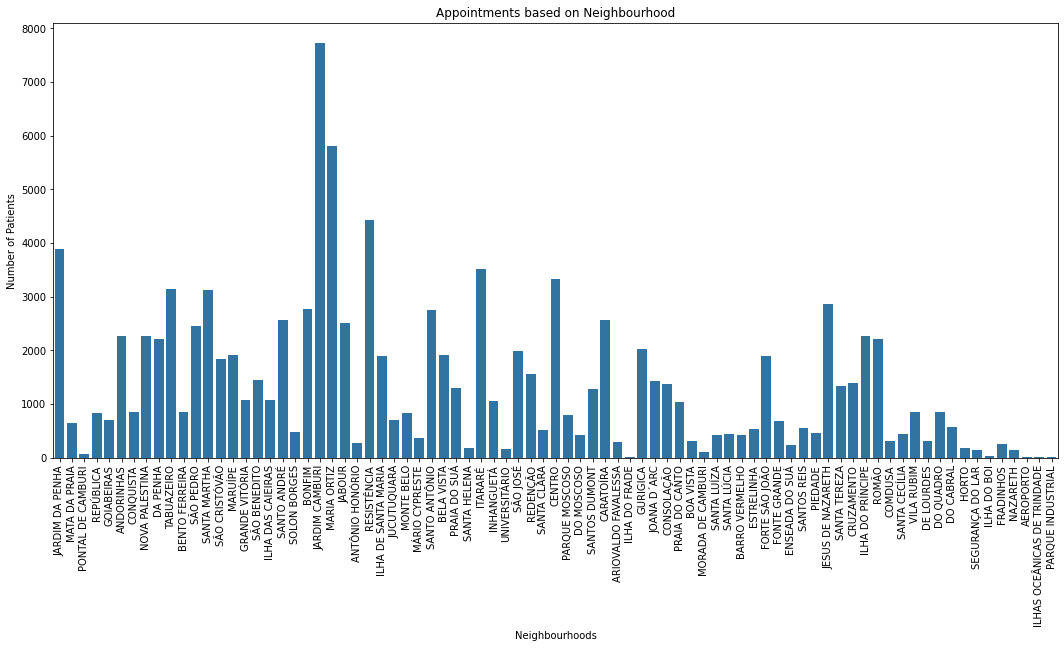

In [253]:
plt.figure(figsize = (18, 8))
plt.xticks(rotation = 90)
baseColor = sns.color_palette()[0]
ax = sns.countplot(x = df['Neighbourhood'], color = baseColor)
plt.title('Appointments based on Neighbourhood')
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Patients')
plt.show()

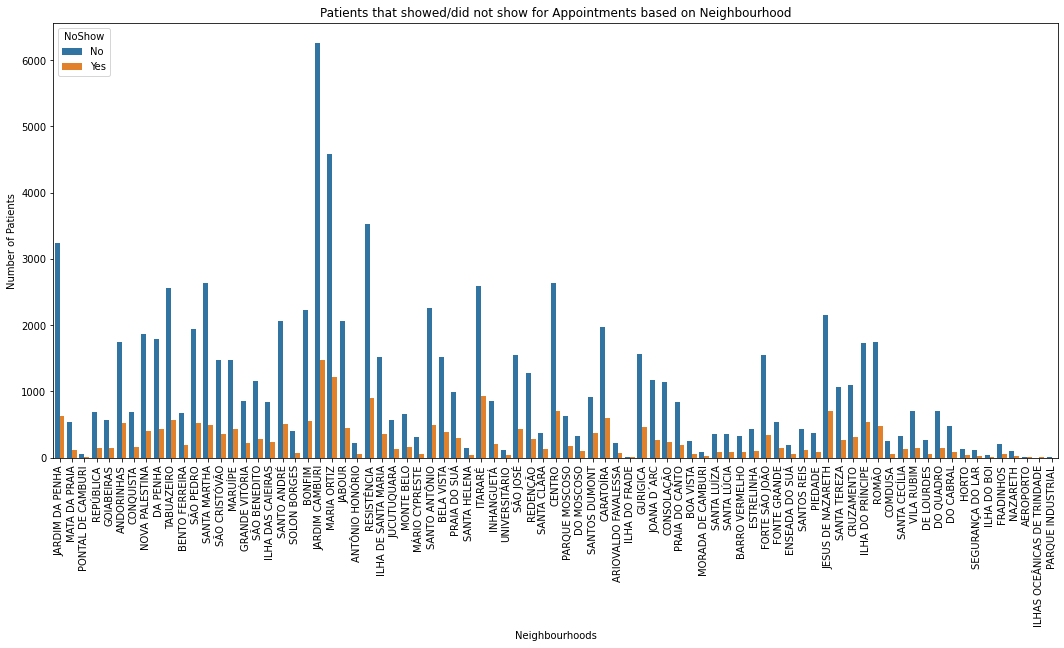

In [195]:
plt.figure(figsize = (18, 8))
plt.xticks(rotation = 90)
ax = sns.countplot(x = df['Neighbourhood'], hue = df['NoShow'])
plt.title('Patients that showed/did not show for Appointments based on Neighbourhood')
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Patients')
plt.show()

From the graph above, it can be seen that the proportion of those that showed up for their appointments across the Neighbourhoods is almost the same based on the total number of patients per neighbourhood.

The same graph plotted below, and in descending order will shed more light

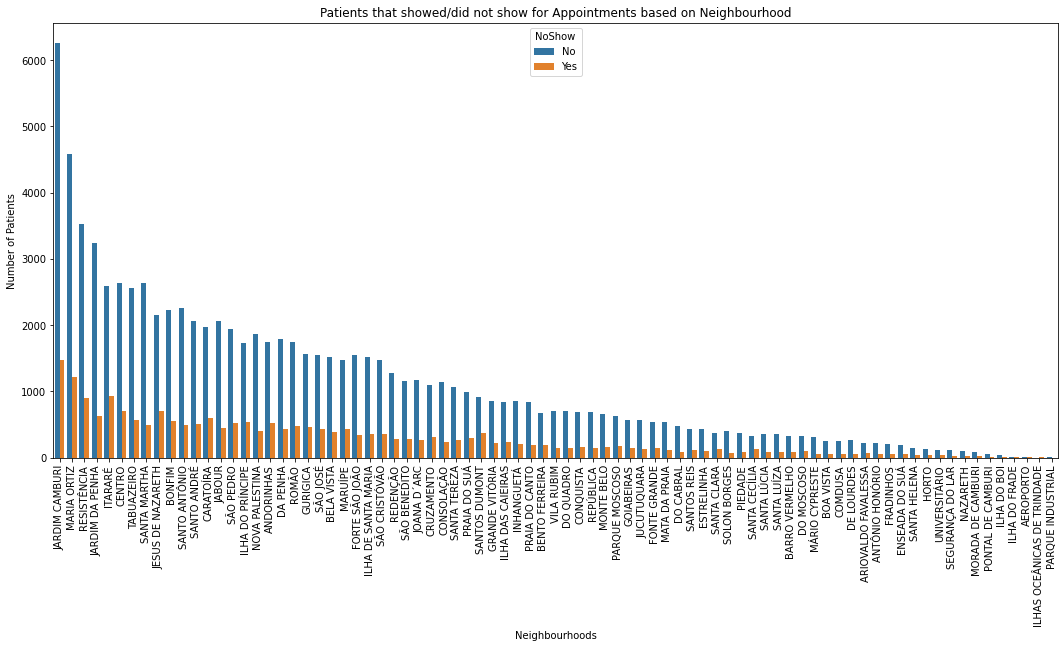

In [197]:
plt.figure(figsize = (18, 8))
plt.xticks(rotation = 90)
ax = sns.countplot(x = df['Neighbourhood'], hue = df['NoShow'], order = df['Neighbourhood'].value_counts().index)
plt.title('Patients that showed/did not show for Appointments based on Neighbourhood')
plt.xlabel('Neighbourhoods')
plt.ylabel('Number of Patients')
plt.show()

We can also go further by calculating the proportion based on the Neighbourhood to shed more light

In [237]:
neiProp = df[df[("NoShow")] == 'No'].groupby(['Neighbourhood']).size() / df.groupby('Neighbourhood').size()
neiProp 

Neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
                         ...   
SÃO JOSÉ               0.783510
SÃO PEDRO              0.789624
TABUAZEIRO             0.817050
UNIVERSITÁRIO          0.789474
VILA RUBIM             0.834313
Length: 81, dtype: float64

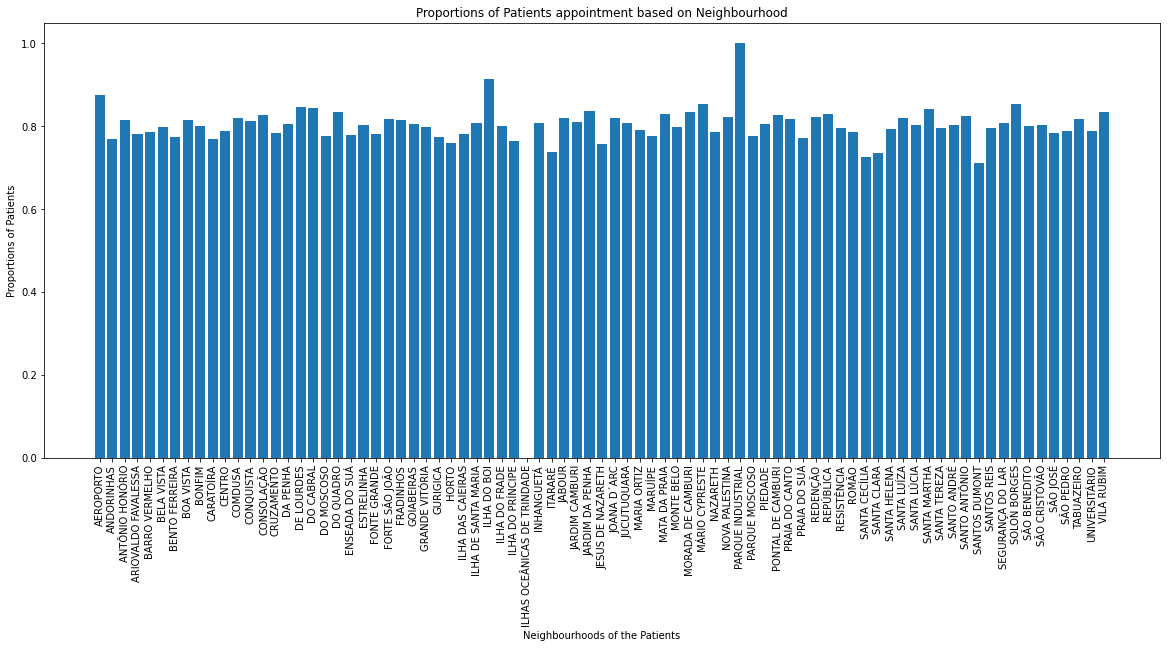

In [238]:
plt.figure(figsize = (20, 8))
plt.bar(neiProp.index, neiProp)
plt.xticks(rotation = 90)
plt.xlabel('Neighbourhoods of the Patients')
plt.ylabel('Proportions of Patients')
plt.title('Proportions of Patients appointment based on Neighbourhood')
plt.show()

We can see that the proportion of the different Neighbourhoods that made it for the appointment is almost similar, though with one or two exceptions, and one neighbourhood not making it to the appointment. Therefore, from above, we can observe that Neighbourhoods are not a factor for determining if a patient will make it for the appointment.

### Appointments Based on Days of the Week

In [201]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Month,AppWeekDay
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday


In [207]:
#The Days of the weeks for the Appointments
df.AppWeekDay.unique()

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'],
      dtype=object)

In [208]:
# Number of Appointments per day of the week
df.AppWeekDay.value_counts()

Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: AppWeekDay, dtype: int64

From above, Saturday has the lowest number of appointments (24) while Tuesday is the highest wiith 26168 appointments scheduled.

In [209]:
#Number of those that showed/did not show for appointment based on day of the week.
df.groupby('AppWeekDay')['NoShow'].value_counts()

AppWeekDay  NoShow
Friday      No        15028
            Yes        3887
Monday      No        18523
            Yes        4561
Saturday    No           23
            Yes           1
Thursday    No        14373
            Yes        3700
Tuesday     No        20877
            Yes        5291
Wednesday   No        19383
            Yes        4879
Name: NoShow, dtype: int64

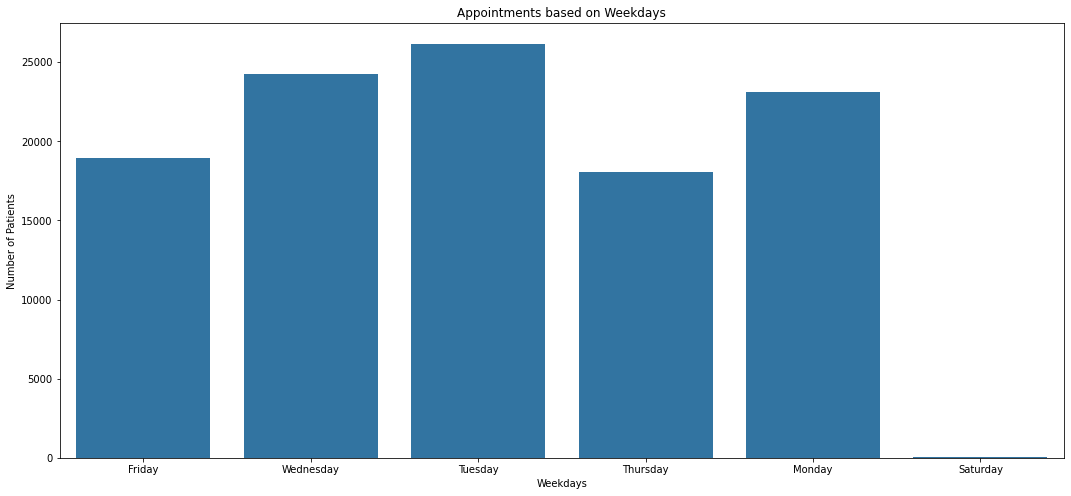

In [254]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(x = df['AppWeekDay'], color = baseColor)
plt.title('Appointments based on Weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Number of Patients')
plt.show()

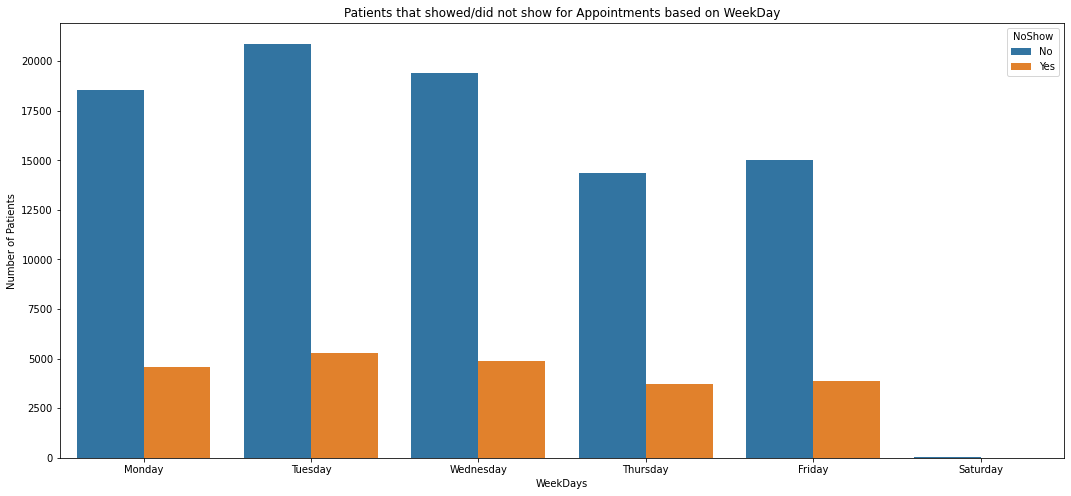

In [227]:
daysOfWeeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize = (18, 8))
ax = sns.countplot(x = df['AppWeekDay'], hue = df['NoShow'], order = daysOfWeeks)
plt.title('Patients that showed/did not show for Appointments based on WeekDay')
plt.xlabel('WeekDays')
plt.ylabel('Number of Patients')
plt.show()

Using the above graph, it can be seen that the proportion of those that showed up for their appointments based on the days of the Week is almost the same. This can be shown further thus:

In [228]:
daysProp = df[df[("NoShow")] == 'No'].groupby(['AppWeekDay']).size() / df.groupby('AppWeekDay').size()
daysProp

AppWeekDay
Friday       0.794502
Monday       0.802417
Saturday     0.958333
Thursday     0.795275
Tuesday      0.797806
Wednesday    0.798904
dtype: float64

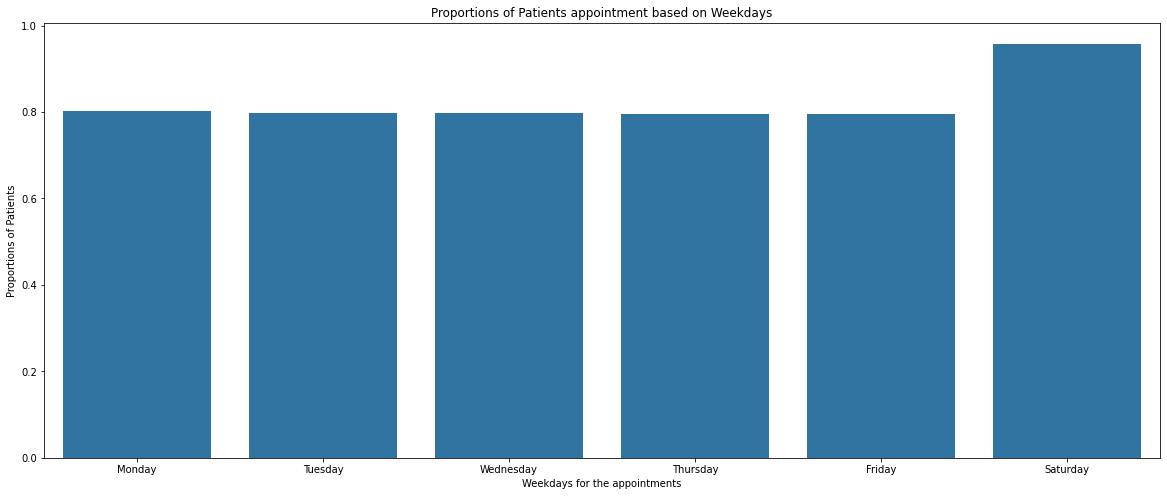

In [255]:
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = daysProp.index, y = daysProp, order = daysOfWeeks, color = baseColor)
plt.xlabel('Weekdays for the appointments')
plt.ylabel('Proportions of Patients')
plt.title('Proportions of Patients appointment based on Weekdays')
plt.show()

From the graph above, we can see that for appointments made between Monday to Friday, the proportion of those that showed up were almost the same. While for Saturday, almost everyone whose appointment was for that day made it. So, the days of the week can be a factor in predicting if a patient will make the appointment.

### Conclusion

Based on the analysis carried above, we can see that in determining the important factors that can help in predicting if a patient will show up for their scheduled appointment, factors such as Gender, Diabetes, Alcoholism, Handicap, Age and Neighbourhood may not be good fit, while Hypertension, SMS, Scholarship and Days of the week can be used.